In [13]:
import numpy as np
import pandas as pd
import math 
import matplotlib
import matplotlib.pyplot as plt

In [14]:
# Function for creating datapoints in the form of a circle
def PointsInCircum(r, n=100):
    return [(math.cos(2 * math.pi / n * x) * r + np.random.normal(-30, 30),  
             math.sin(2 * math.pi / n * x) * r + np.random.normal(-30, 38)) for x in range(1, n + 1)]

In [15]:
# Creating data points in the form of circles
df1 = pd.DataFrame(PointsInCircum(500, 1800), columns=['x', 'y'])
df2 = pd.DataFrame(PointsInCircum(300, 700), columns=['x', 'y'])
df3 = pd.DataFrame(PointsInCircum(100, 300), columns=['x', 'y'])

In [19]:
# Adding noise to the dataset
noise = pd.DataFrame([(np.random.randint(-600, 600), np.random.randint(-600, 600)) for _ in range(300)], columns=['x', 'y'])

# Concatenating all data into one DataFrame
df = pd.concat([df1, df2, df3, noise], ignore_index=True)

In [20]:
df.head()

,x,y
0,473.030636,-22.155918
1,451.285228,-8.775507
2,498.762771,11.732724
3,501.307063,7.474182
4,493.772313,23.170037


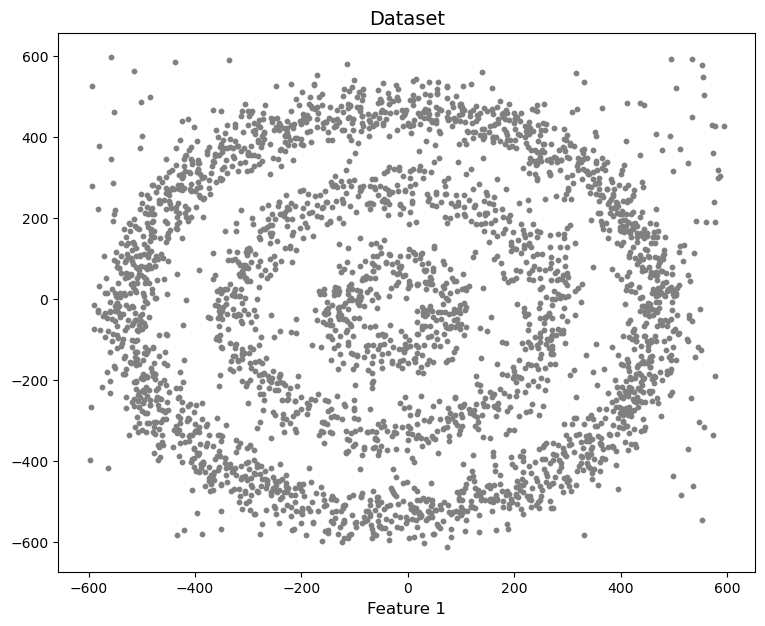

In [85]:
plt.figure(figsize = (9,7))
plt.scatter(df['x'],df['y'],s = 10, color = 'gray')
plt.title('Dataset', fontsize = 14)
plt.xlabel("Feature 1", fontsize = 12)
plt.xlabel("Feature 1", fontsize = 12)
plt.show()

# 1. K-Mean Clustering

/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

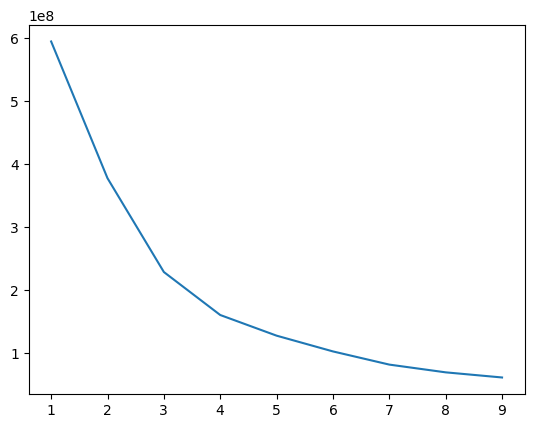

In [88]:
from sklearn.cluster import KMeans


# calculate the k value by using the elbow method
value = range(1,10)
wsc = []
for i in value:
    km = KMeans(n_clusters=i)
    km.fit_transform(df[['x','y']])
    wsc.append(km.inertia_)
plt.plot(value,wsc) 

In [89]:
kmean = KMeans(n_clusters=4, random_state=42)
kmean.fit_predict(df[['x','y']])
df["KMeans_Cluster"] = kmean.labels_

/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


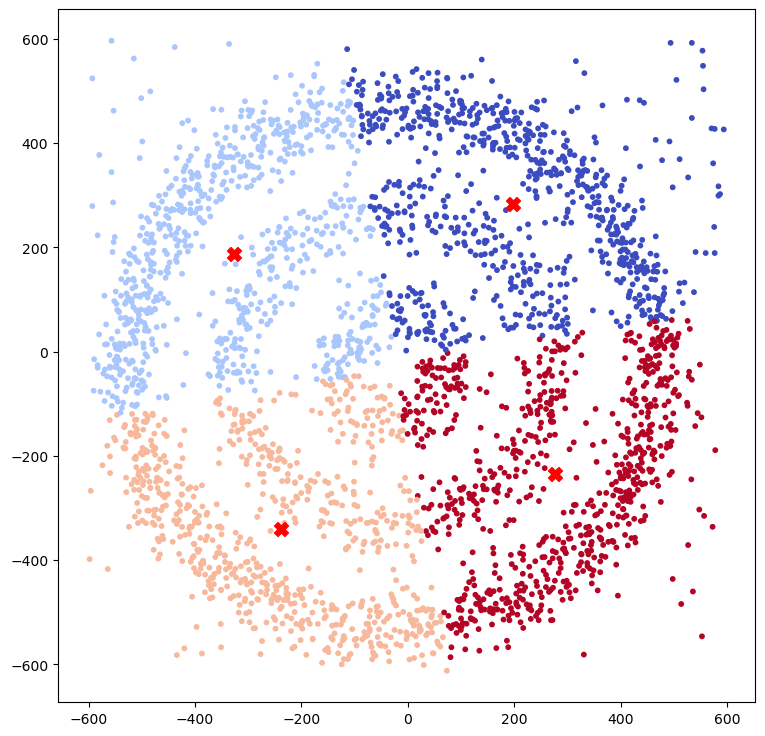

In [147]:
plt.figure(figsize = (9,9))
plt.scatter(x=df["x"], y=df["y"],c=df["KMeans_Cluster"], cmap="coolwarm",s = 10)
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker = 'X',c= 'red',s = 100)
plt.show()

#### 1. Models Accuracy

In [95]:
# checking the score

from sklearn.metrics import silhouette_score
kmean_score = silhouette_score(df[['x','y']],df["KMeans_Cluster"])
kmean_score

0.376797405419192

#### 2. Outliers do not exist in K-Means as it take every point into a cluster.

#### 3. Models Speed Evaluation

In [99]:
import time

# Measure time for speed evaluation
start_time = time.time()

# Computing KMean execution time
kmean_time = time.time() - start_time
print(f"{kmean_time:.6f} sec")

0.000060 sec


# 2. Hierarchical Clustering

In [149]:
# two types: 
  # 1. AgglomerativeClustering: bottom to top clustering
  # 2. DiClustering: TOP to BOTTOM clustering



from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean')
hc.fit_predict(df[['x','y']])
df['Hierarchical_clusters'] = hc.labels_

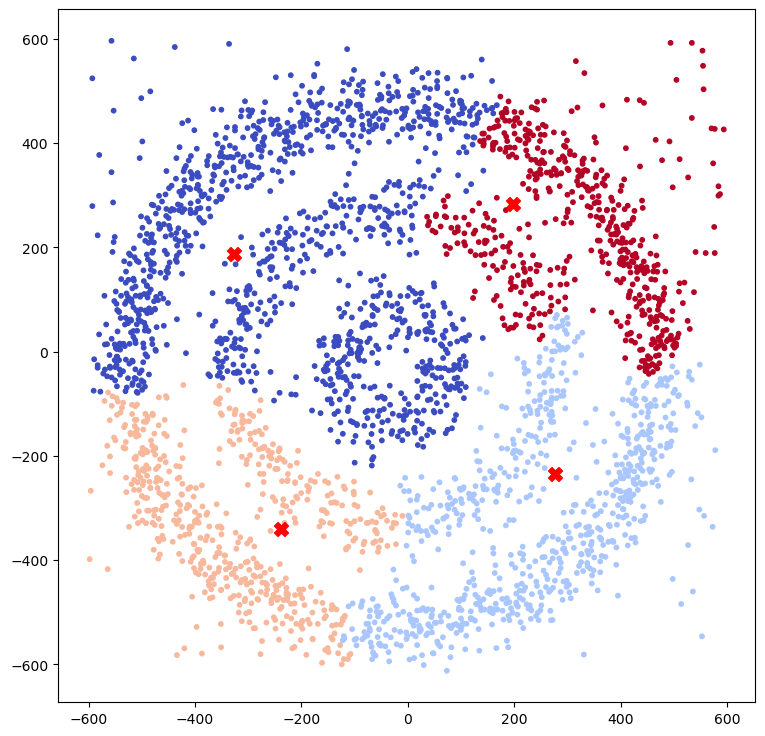

In [151]:
plt.figure(figsize =(9,9))
plt.scatter(x=df["x"], y=df["y"],s = 10, c =df['Hierarchical_clusters'], cmap='coolwarm')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker = 'X',c= 'red',s = 100)
plt.show()

In [107]:
# 1. Accurracy 
# checking the score
hierarchical_score = silhouette_score(df[['x','y']], df['Hierarchical_clusters'])
hierarchical_score

0.331688902926799

In [110]:
# 2. Outliers do not exist in K-Means as it take every point into a cluster.

In [112]:
# 3.Models Speed Evaluation 

import time

# Measure time for speed evaluation
start_time = time.time()

# Computing KMean execution time
hierarchical_time = time.time() - start_time
print(f"{hierarchical_time:.6f} sec")

0.000034 sec


# 3. DBSCAN Clustering

In [118]:
# calculating best epsilion and distance value

from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5).fit(df[['x','y']])
distances, _ = nn.kneighbors(df[['x','y']])
distances = np.sort(distances[:,-1])
distances

array([  4.12811838,   4.39561982,   4.39587805, ..., 121.40016474,
       126.99797975, 176.20442673])

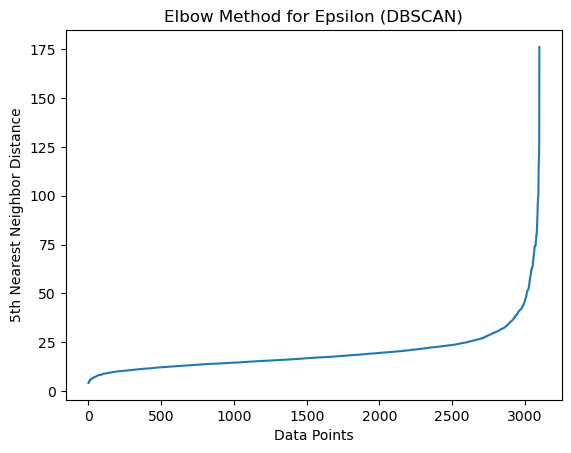

In [120]:
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("Elbow Method for Epsilon (DBSCAN)")
plt.show()

In [122]:
# As we can the curve bend sharply update between 30 and 40 so slecteching 35 as the epsilion value

In [124]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=30,min_samples=6) # eps = circile raidis,min_samples = min points should be in circile 
db.fit_predict(df[['x','y']])
df['Dbscan_clusters'] = db.labels_

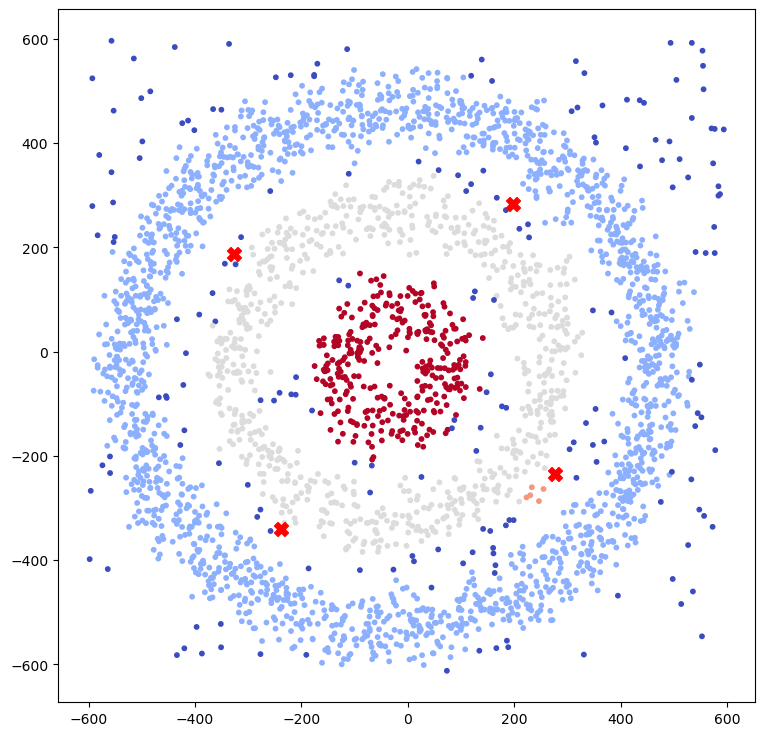

In [143]:
plt.figure(figsize = (9,9))
plt.scatter(x=df["x"], y=df["y"],s = 10, c = df['Dbscan_clusters'],cmap='coolwarm')
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker = 'X',c= 'red',s = 100)
plt.show()

In [134]:
# 1. Accuracy
from sklearn.metrics import silhouette_score

# Remove noise points (-1) before calculating the score
filtered_df = df[df['Dbscan_clusters'] != -1]  # Exclude noise points
dbscan_score = silhouette_score(filtered_df[['x', 'y']], filtered_df['Dbscan_clusters'])

print(f"dbscan_score: {dbscan_score:.4f}")

dbscan_score: -0.2309


In [136]:
# Lower values (close to 0) indicate well-separated clusters.
# Higher values suggest poor clustering.

from sklearn.metrics import davies_bouldin_score

# Exclude noise points (-1)
davies_bouldin = davies_bouldin_score(filtered_df[['x', 'y']], filtered_df['Dbscan_clusters'])

print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

Davies-Bouldin Index: 194.2468


In [138]:
# 3.Models Speed Evaluation 

import time

# Measure time for speed evaluation
start_time = time.time()

# Computing KMean execution time
dbscan_time = time.time() - start_time
print(f"{dbscan_time:.6f} sec")

0.000039 sec


In [140]:

results = pd.DataFrame({
    "Evaluation": ["Silhouette Score", "Execution Time(sec.)"],
    "K-Mean": [
        f"{kmean_score:.6f}",
        f"{kmean_time:.6f}",
    ],
    "DBSCAN": [
        f"{dbscan_score:.6f}",
        f"{dbscan_time:.6f}",
    ],
    "Hierarchical": [
        f"{hierarchical_score:.6f}",
        f"{hierarchical_time:.6f}",
    ]
})

print(results)

             Evaluation    K-Mean     DBSCAN Hierarchical
0      Silhouette Score  0.376797  -0.230936     0.331689
1  Execution Time(sec.)  0.000060   0.000039     0.000034


In [153]:
df.head()

,x,y,KMeans_Cluster,Hierarchical_clusters,Dbscan_clusters
0,473.030636,-22.155918,3,3,0
1,451.285228,-8.775507,3,3,0
2,498.762771,11.732724,3,3,0
3,501.307063,7.474182,3,3,0
4,493.772313,23.170037,3,3,0
